### Importing the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df.head())
print(df.info())

### Checking the column names and their description for feature extraction

In [2]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

### Training a Linear Regression Model

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the train.csv file
df = pd.read_csv("train.csv")

# 2. Cleaning the dataset by handling missing numeric values
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

# 3. Feature extraction
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

# Features for training
features = [
    'GrLivArea',    
    'LotArea',      
    'TotalBsmtSF',  
    '1stFlrSF',     
    '2ndFlrSF',     
    'GarageArea',   
    'BedroomAbvGr', 
    'TotalBathrooms' 
]

X = df[features]
y = df['SalePrice']

# 4. Splitting the training and testing dataset where 80% is for training and 20% for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_val)

# 6. Evaluating the model
rmse = mean_squared_error(y_val, y_pred) ** 0.5
r2 = r2_score(y_val, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coef_df)

# 7. User input for prediction
print("\nEnter the details of the house:")
user_input = []
for feature in features:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

predicted_price = model.predict([user_input])
print(f"\nPredicted price for the entered house: ${predicted_price[0]:,.2f}")


Root Mean Squared Error (RMSE): 43254.95
R² Score: 0.76

Model Coefficients:
          Feature   Coefficient
0       GrLivArea      9.654026
1         LotArea      0.358953
2     TotalBsmtSF     44.267076
3        1stFlrSF     48.794962
4        2ndFlrSF     50.506307
5      GarageArea     81.240471
6    BedroomAbvGr -15074.686885
7  TotalBathrooms  25181.355830

Enter the details of the house:


Enter GrLivArea:  2000
Enter LotArea:  8000
Enter TotalBsmtSF:  900
Enter 1stFlrSF:  1200
Enter 2ndFlrSF:  800
Enter GarageArea:  400
Enter BedroomAbvGr:  3
Enter TotalBathrooms:  2



Predicted price for the entered house: $199,975.90


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Data Visualization

#### 1. Correlation Heatmap:Shows how strongly each feature is related to SalePrice and to other features.

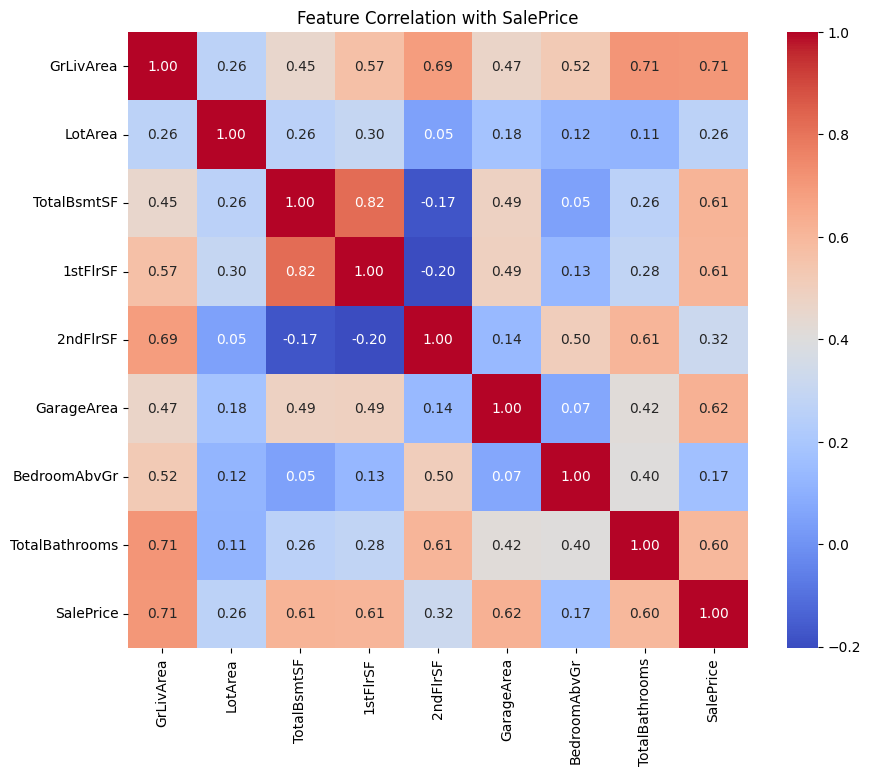

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#1.Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[features + ['SalePrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with SalePrice")
plt.show()

#### 2.Actual vs Predicted Scatter Plot:Compares what the model predicted vs the actual price for the validation set.

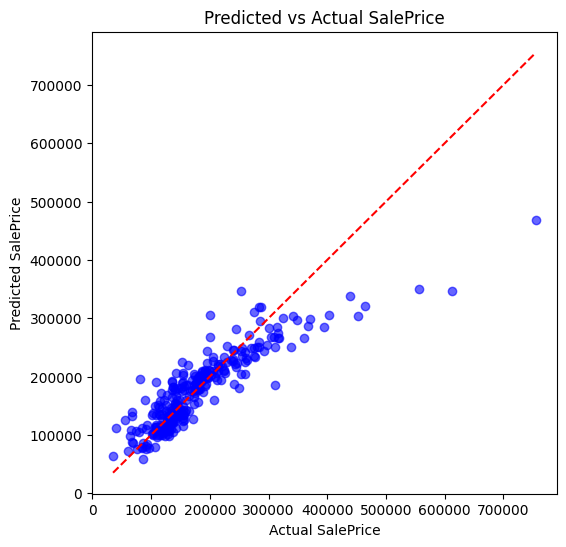

In [10]:
#2.Actual vs Predicted Scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Perfect fit line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice")
plt.show()


#### 3.Residual Histogram-Checks errors (residuals = actual − predicted).

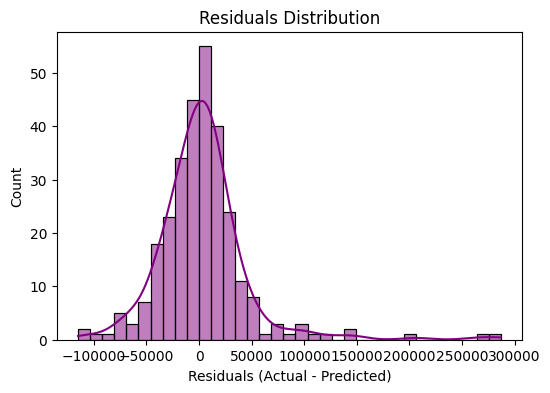

In [11]:
residuals = y_val - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()